In [ ]:
!pip install numpy matplotlib scipy pyaca

In [3]:
import pyACA
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Spectral Features

/Users/vedant/miniconda3/lib/python3.9/site-packages/pyACA/ToolReadAudio.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [f_s, x] = wavread(cAudioFilePath)


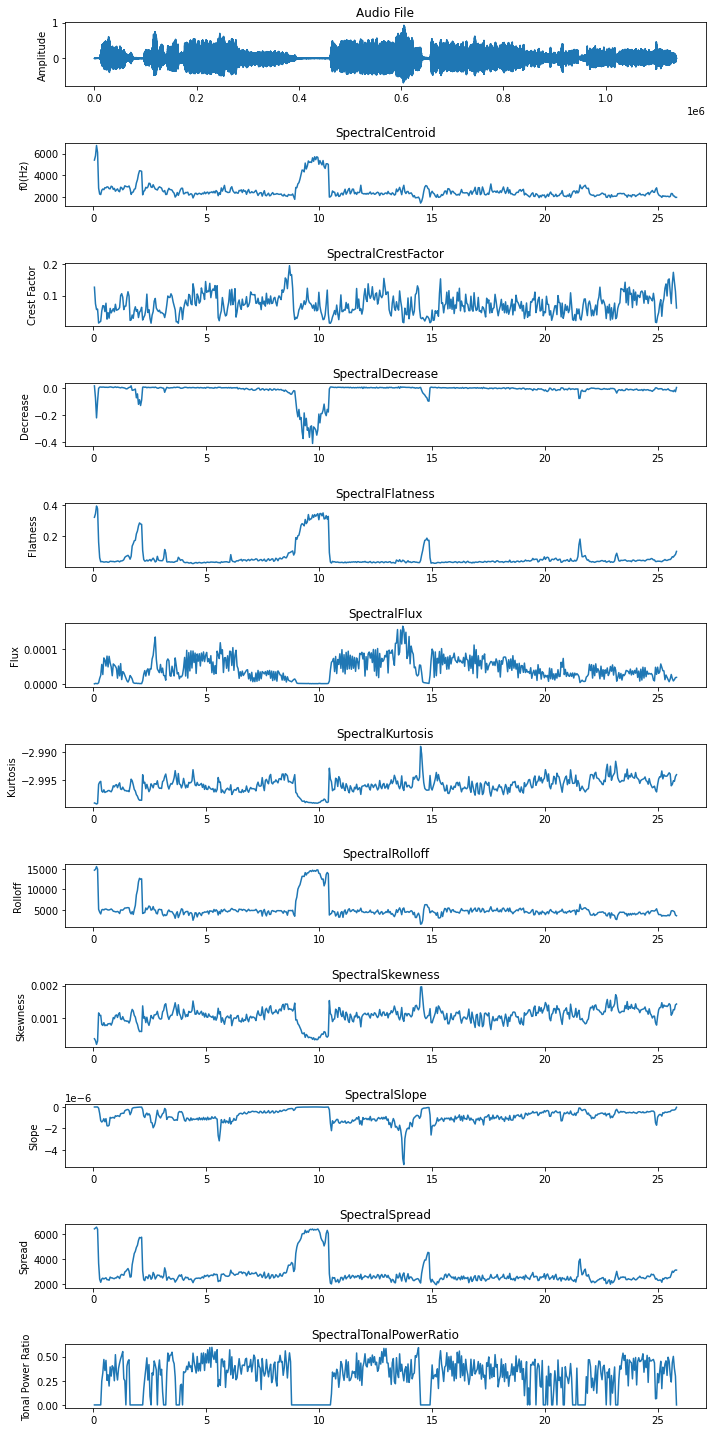

In [38]:
spectral_features = ['SpectralCentroid','SpectralCrestFactor','SpectralDecrease','SpectralFlatness','SpectralFlux','SpectralKurtosis', 'SpectralRolloff','SpectralSkewness','SpectralSlope','SpectralSpread','SpectralTonalPowerRatio']
ax_labels = ['f0(Hz)','Crest Factor','Decrease','Flatness','Flux','Kurtosis', 'Rolloff','Skewness','Slope','Spread','Tonal Power Ratio']
fig,axs = plt.subplots(len(spectral_features)+1,1,figsize=(10,20))
f_s, x = pyACA.ToolReadAudio('../audio/01-D_AMairena.wav')
axs[0].plot(x)
axs[0].set_title('Audio File')
axs[0].set_ylabel('Amplitude')
for idx, feature in enumerate(spectral_features):
    v,t = pyACA.computeFeature(feature,x, f_s)
    axs[idx+1].plot(t, v)
    axs[idx+1].set_title(feature)
    axs[idx+1].set_ylabel(ax_labels[idx])
fig.tight_layout()

### Temporal Features

/Users/vedant/miniconda3/lib/python3.9/site-packages/pyACA/ToolReadAudio.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [f_s, x] = wavread(cAudioFilePath)


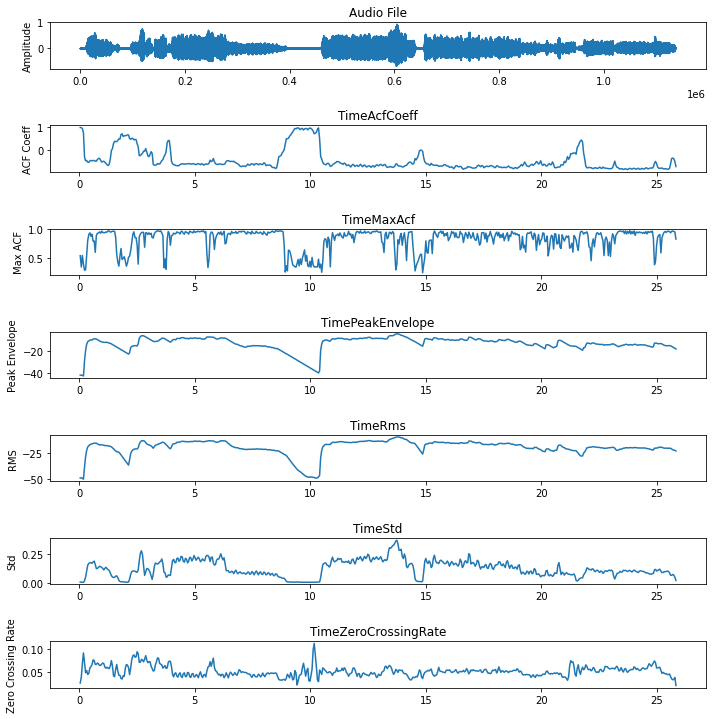

In [37]:
temporal_features = ['TimeAcfCoeff','TimeMaxAcf','TimePeakEnvelope','TimeRms','TimeStd','TimeZeroCrossingRate']
ax_labels = ['ACF Coeff','Max ACF','Peak Envelope','RMS','Std','Zero Crossing Rate']
fig,axs = plt.subplots(len(temporal_features)+1,1,figsize=(10,10))
f_s, x = pyACA.ToolReadAudio('../audio/01-D_AMairena.wav')
axs[0].plot(x)
axs[0].set_title('Audio File')
axs[0].set_ylabel('Amplitude')
for idx, feature in enumerate(temporal_features):
    v,t = pyACA.computeFeature(feature,x, f_s)
    if feature == 'TimeAcfCoeff':
        axs[idx+1].plot(t, v[0])
    elif feature in ['TimeMaxAcf', 'TimeStd', 'TimeZeroCrossingRate']:
        axs[idx+1].plot(t, v)
    else:
        axs[idx+1].plot(t, v[1])
    axs[idx+1].set_title(feature)
    axs[idx+1].set_ylabel(ax_labels[idx])
fig.tight_layout()

### MFCCs

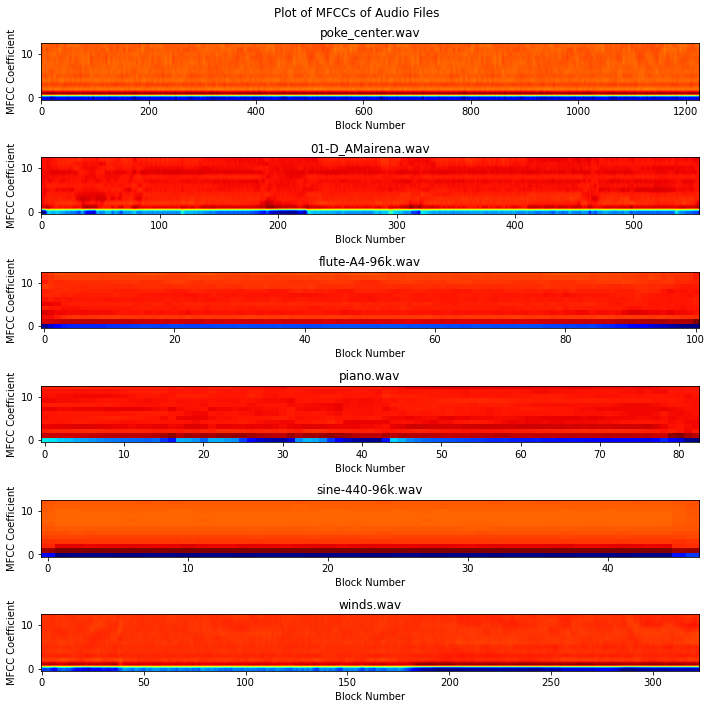

In [52]:
file_names = ['poke_center.wav','01-D_AMairena.wav','flute-A4-96k.wav','piano.wav','sine-440-96k.wav', 'winds.wav']
fig,axs = plt.subplots(len(file_names),1,figsize=(10,10))
fig.suptitle('Plot of MFCCs of Audio Files')
for idx, f in enumerate(file_names):
    f_s, x = pyACA.ToolReadAudio('../audio/'+f)
    v,t = pyACA.computeFeature('SpectralMfccs',x, f_s)
    axs[idx].imshow(v, aspect='auto', origin='lower', cmap='jet')
    axs[idx].set_title(f)
for ax in axs.flat:
    ax.set(xlabel='Block Number', ylabel='MFCC Coefficient')
fig.tight_layout()